In [1]:
import pandas as pd
import json

df = pd.read_csv("datasets/Deezer/train.csv")

csv_valid = df['lyrics'].apply(lambda x: isinstance(x, str) and x.strip() != "").sum()

print(f"Valid lyrics in CSV: {csv_valid}")

Valid lyrics in CSV: 7192


In [2]:
df.head()

,dzr_sng_id,MSD_track_id,valence,arousal,artist_name,track_name,lyrics,orig_bpm,est_bpm,bpm_diff_flag,key_est,mode_est,msd_key,msd_mode,msd_key_conf,msd_mode_conf,msd_loudness
0,216752,TRLBHVY128F4242C31,-1.400403,1.538229,Anorexia Nervosa,Stabat mater dolorosa,We are the Sun\nWe are the dead stars\nWe are ...,110.0,112.35,False,G,minor,G,major,0.636,0.538,-7.027
1,239138,TRQJZHB128F92FA42D,-1.935250,-0.655810,Jimmy Witherspoon,Ain't Nobody's Business,One day we got ham and bacon\nThe next day ain...,78.3,156.60,True,Bb,major,D,minor,0.169,0.295,-10.016
2,266313,TRPMWQM128F932C0C8,1.257460,1.086515,The Walkmen,Brandy alexander,Finally close the door\nYou'd left open wide\n...,118.8,117.45,False,Bb,major,D#,major,0.015,0.390,-7.058
3,283306,TRABHPA12903CEC222,0.373325,-0.923151,Duke Ellington,Caravan,Night\nAnd stars above that shine so bright\nT...,108.2,107.67,False,C,minor,G#,major,0.275,0.403,-18.194
4,301623,TRDLPSL128F92FA016,1.071901,0.846830,Ella Fitzgerald,Lullaby Of Birdland,"Oh, lullaby of Birdland, that's what I\nAlways...",109.7,112.35,False,C,minor,F,minor,0.420,0.373,-9.526


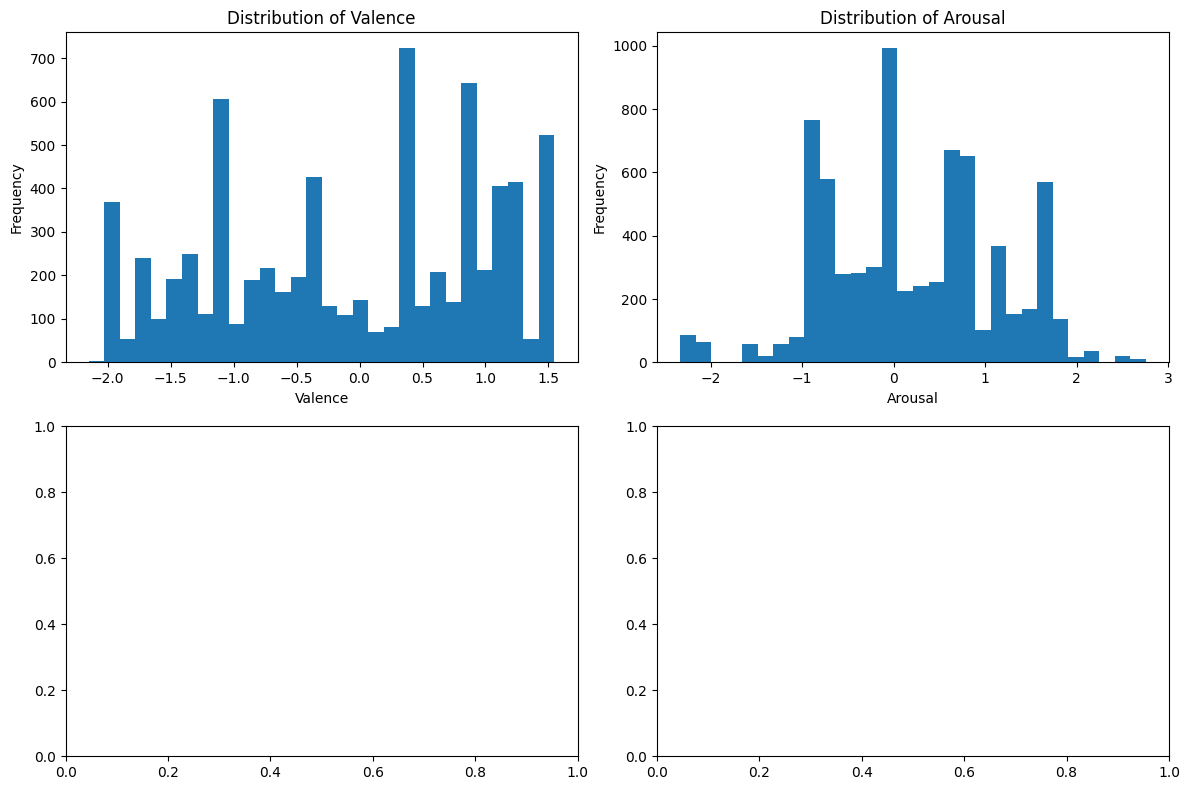

In [5]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 columns

columns = ['valence', 'arousal']
titles = [col.replace('_', ' ').title() for col in columns]

for i, (col, title) in enumerate(zip(columns, titles)):
    row = i // 2
    col_pos = i % 2
    axs[row][col_pos].hist(df[col].dropna(), bins=30)
    axs[row][col_pos].set_title(f'Distribution of {title}')
    axs[row][col_pos].set_xlabel(title)
    axs[row][col_pos].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

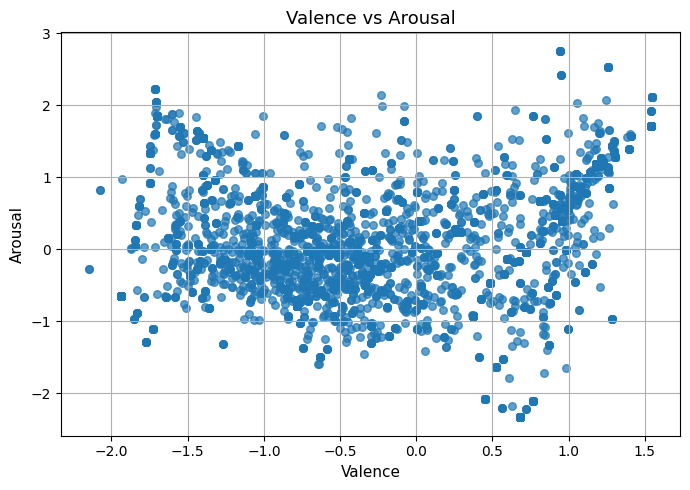

In [11]:
import matplotlib.pyplot as plt

# Scatter: means
plt.figure(figsize=(7, 5))  # slightly enlarged
plt.scatter(df['valence'], df['arousal'], alpha=0.7, s=30)
plt.title('Valence vs Arousal', fontsize=13)
plt.xlabel('Valence', fontsize=11)
plt.ylabel('Arousal', fontsize=11)
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipykernel_519/1538755133.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


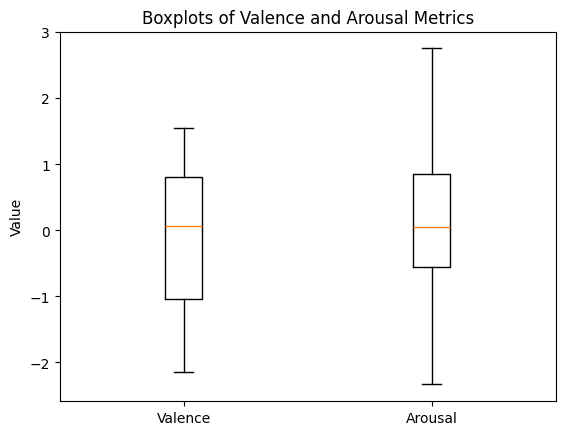

In [7]:
# Boxplot of all metrics
plt.figure()
plt.boxplot([
    df['valence'].dropna(),
    df['arousal'].dropna()
], labels=['Valence', 'Arousal'])
plt.title('Boxplots of Valence and Arousal Metrics')
plt.ylabel('Value')

plt.show()

In [8]:
import pandas as pd
from langdetect import detect

def detect_language(text):
    try:
        return detect(text)
    except:
        return None

df['language'] = df['lyrics'].apply(detect_language)

# Filter rows where detected language is not English
non_english_songs = df[df['language'] != 'en']

# Display the non-English songs
len(df) - len(non_english_songs)

7187

In [9]:
mask = df['lyrics'].notna() & (df['language'] != 'en')
non_english_lyrics = df.loc[mask, 'lyrics']

print(non_english_lyrics)

574     Chewin' on a piece of grass\nWalkin' down the ...
3782    Prasanna vadanaaM saubhaagyadaaM bhaagyadaaM\n...
3783    I am hunted by the future\nWill the future be ...
4199    Oh, when I woke up tonight, I said Im\nGoing t...
4311    Oh, when I woke up tonight, I said Im\nGoing t...
Name: lyrics, dtype: object
